In [1]:
spark

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
0,application_1686314838885_0001,pyspark,idle,Link,Link,None,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [2]:
sc.install_pypi_package('pandas')
sc.install_pypi_package('matplotlib')
sc.install_pypi_package('fsspec')
sc.install_pypi_package('s3fs ')
sc.install_pypi_package('seaborn')
sc.install_pypi_package('plotly')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [3]:
from pyspark.sql.types import *
import pyspark.sql.functions as F
from pyspark.sql.types import *
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Loading the dataset

### Hail

In [4]:
s3_uri = 's3a://noaa-swdi-pds/hail-????.csv'

schema = StructType([
    StructField("ZTIME", StringType(), nullable=True),
    StructField("LON", DoubleType(), nullable=True),
    StructField("LAT", DoubleType(), nullable=True),
    StructField("WSR_ID", StringType(), nullable=True),
    StructField("CELL_ID", StringType(), nullable=True),
    StructField("RANGE", DoubleType(), nullable=True),
    StructField("AZIMUTH", DoubleType(), nullable=True),
    StructField("SEVPROP", DoubleType(), nullable=True),
    StructField("PROB", DoubleType(), nullable=True)
])

hail = (
    spark
    .read
    .csv(s3_uri, header=True, schema=schema)
    .where(F.col('LON').isNotNull())
    .withColumn('ZTIME', F.to_timestamp(F.col('ZTIME'), 'yyyyMMddHHmmss'))
    .withColumn('ZDAY', F.date_format(F.col('ZTIME'), 'yyyy-MM-dd'))
    .withColumn('ZYEAR', F.year('ZTIME'))
    .withColumn('ZMONTH', F.month('ZTIME'))
    )

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### MDA

In [5]:
s3_uri = 's3a://noaa-swdi-pds/mda-????.csv'

schema = StructType([
    StructField("ZTIME", StringType(), nullable=True),
    StructField("LON", DoubleType(), nullable=True),
    StructField("LAT", DoubleType(), nullable=True),
    StructField("WSR_ID", StringType(), nullable=True),
    StructField("CELL_ID", StringType(), nullable=True),
    StructField("STR_RANK", IntegerType(), nullable=True),
    StructField("SCIT_ID", StringType(), nullable=True),
    StructField("RANGE", DoubleType(), nullable=True),
    StructField("AZIMUTH", DoubleType(), nullable=True),
    StructField("LL_ROT_VEL", DoubleType(), nullable=True),
    StructField("LL_DV", DoubleType(), nullable=True),
    StructField("LL_BASE", DoubleType(), nullable=True),
    StructField("DEPTH_KFT", DoubleType(), nullable=True),
    StructField("DPTH_STMRL", DoubleType(), nullable=True),
    StructField("MAX_RV_KFT", DoubleType(), nullable=True),
    StructField("MAX_RV_KTS", DoubleType(), nullable=True),
    StructField("TVS", StringType(), nullable=True),
    StructField("MOTION_DEG", DoubleType(), nullable=True),
    StructField("MOTION_KTS", DoubleType(), nullable=True),
    StructField("MSI", StringType(), nullable=True)
])

mda = (
    spark
    .read
    .csv(s3_uri, header=True, schema=schema)
    .where(F.col('LON').isNotNull())
    .withColumn('ZTIME', F.to_timestamp(F.col('ZTIME'), 'yyyyMMddHHmmss'))
    .withColumn('ZDAY', F.date_format(F.col('ZTIME'), 'yyyy-MM-dd'))
    .withColumn('ZYEAR', F.year('ZTIME'))
    .withColumn('ZMONTH', F.month('ZTIME'))
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### Mesocyclones

In [6]:
s3_uri = 's3a://noaa-swdi-pds/meso-????.csv' # no 2021

schema = StructType([
    StructField("ZTIME", StringType(), nullable=True),
    StructField("LON", DoubleType(), nullable=True),
    StructField("LAT", DoubleType(), nullable=True),
    StructField("WSR_ID", StringType(), nullable=True),
    StructField("CELL_ID", StringType(), nullable=True),
    StructField("CELL_TYPE", StringType(), nullable=True),
    StructField("RANGE", DoubleType(), nullable=True),
    StructField("AZIMUTH", DoubleType(), nullable=True),
    StructField("BASE_HEIGHT", DoubleType(), nullable=True),
    StructField("TOP_HEIGHT", DoubleType(), nullable=True),
    StructField("HEIGHT", DoubleType(), nullable=True),
    StructField("RADIUS", DoubleType(), nullable=True),
    StructField("AZDIA", DoubleType(), nullable=True),
    StructField("SHEAR", DoubleType(), nullable=True)
])

meso = (
    spark
    .read
    .csv(s3_uri, header=True, schema=schema)
    .where(F.col('LON').isNotNull())
    .withColumn('ZTIME', F.to_timestamp(F.col('ZTIME'), 'yyyyMMddHHmmss'))
    .withColumn('ZDAY', F.date_format(F.col('ZTIME'), 'yyyy-MM-dd'))
    .withColumn('ZYEAR', F.year('ZTIME'))
    .withColumn('ZMONTH', F.month('ZTIME'))
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### PLSR

In [7]:
s3_uri = 's3a://noaa-swdi-pds/plsr-????.csv' # no 2021

schema = StructType([
    StructField("ZTIME", StringType(), nullable=True),
    StructField("LON", DoubleType(), nullable=True),
    StructField("LAT", DoubleType(), nullable=True),
    StructField("EVENT", StringType(), nullable=True),
    StructField("MAGNITUDE", DoubleType(), nullable=True),
    StructField("CITY", StringType(), nullable=True),
    StructField("COUNTY", StringType(), nullable=True),
    StructField("STATE", StringType(), nullable=True),
    StructField("SOURCE", StringType(), nullable=True),
    StructField("WFO", StringType(), nullable=True),
    StructField("REMARKS", StringType(), nullable=True)
])

plsr = (
    spark
    .read
    .csv(s3_uri, header=True, schema=schema)
    .where(F.col('LON').isNotNull())
    .withColumn('ZTIME', F.to_timestamp(F.col('ZTIME'), 'yyyyMMddHHmmss'))
    .withColumn('ZDAY', F.date_format(F.col('ZTIME'), 'yyyy-MM-dd'))
    .withColumn('ZYEAR', F.year('ZTIME'))
    .withColumn('ZMONTH', F.month('ZTIME'))
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### Storm Structure

In [8]:
s3_uri = 's3a://noaa-swdi-pds/structure-????.csv'

schema = StructType([
    StructField("ZTIME", StringType(), nullable=True),
    StructField("LON", DoubleType(), nullable=True),
    StructField("LAT", DoubleType(), nullable=True),
    StructField("WSR_ID", StringType(), nullable=True),
    StructField("CELL_ID", StringType(), nullable=True),
    StructField("RANGE", DoubleType(), nullable=True),
    StructField("AZIMUTH", DoubleType(), nullable=True),
    StructField("BASE_HEIGHT", DoubleType(), nullable=True),
    StructField("TOP_HEIGHT", DoubleType(), nullable=True),
    StructField("VIL", DoubleType(), nullable=True),
    StructField("MAX_REFLECT", DoubleType(), nullable=True),
    StructField("HEIGHT", DoubleType(), nullable=True)
])

structure = (
    spark
    .read
    .csv(s3_uri, header=True, schema=schema)
    .where(F.col('LON').isNotNull())
    .withColumn('ZTIME', F.to_timestamp(F.col('ZTIME'), 'yyyyMMddHHmmss'))
    .withColumn('ZDAY', F.date_format(F.col('ZTIME'), 'yyyy-MM-dd'))
    .withColumn('ZYEAR', F.year('ZTIME'))
    .withColumn('ZMONTH', F.month('ZTIME'))
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### TVS

In [9]:
s3_uri = 's3a://noaa-swdi-pds/tvs-????.csv'

schema = StructType([
    StructField("ZTIME", StringType(), True),
    StructField("LON", DoubleType(), True),
    StructField("LAT", DoubleType(), True),
    StructField("WSR_ID", StringType(), True),
    StructField("CELL_ID", StringType(), True),
    StructField("CELL_TYPE", StringType(), True),
    StructField("RANGE", DoubleType(), True),
    StructField("AZIMUTH", DoubleType(), True),
    StructField("AVGDV", DoubleType(), True),
    StructField("LLDV", DoubleType(), True),
    StructField("MXDV", DoubleType(), True),
    StructField("MXDV_HEIGHT", DoubleType(), True),
    StructField("DEPTH", DoubleType(), True),
    StructField("BASE", DoubleType(), True),
    StructField("TOP", DoubleType(), True),
    StructField("MAX_SHEAR", DoubleType(), True),
    StructField("MAX_SHEAR_HEIGHT", DoubleType(), True)
])

tvs = (
    spark
    .read
    .csv(s3_uri, header=True, schema=schema)
    .where(F.col('LON').isNotNull())
    .withColumn('ZTIME', F.to_timestamp(F.col('ZTIME'), 'yyyyMMddHHmmss'))
    .withColumn('ZDAY', F.date_format(F.col('ZTIME'), 'yyyy-MM-dd'))
    .withColumn('ZYEAR', F.year('ZTIME'))
    .withColumn('ZMONTH', F.month('ZTIME'))
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### Warnings

In [10]:
s3_uri = 's3a://noaa-swdi-pds/warn-????.csv' # no 2017 onwards

schema = StructType([
    StructField("ISSUEDATE", TimestampType(), True),
    StructField("EXPIREDATE", StringType(), True),
    StructField("ISSUEWFO", StringType(), True),
    StructField("MESSAGEID", StringType(), True),
    StructField("MESSAGETYPE", StringType(), True),
    StructField("WARNINGTYPE", StringType(), True),
    StructField("POLYGON", StringType(), True)
])

warn = (
    spark
    .read
    .csv(s3_uri, header=True, schema=schema)
    .where(F.col('ISSUEDATE').isNotNull())
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Exploratory Analysis

### Class frequencies over time

In [11]:
def plot_lineplot(dataframe, x_column, y_column, ax, xlabel, ylabel, subplot_title):
    dataframe[x_column] = pd.to_datetime(dataframe[x_column],
                                         format='%Y-%m-%d')
    
    dataframe.set_index(x_column, inplace=True)

    date_range = pd.date_range(start=dataframe.index.min(),
                               end=dataframe.index.max(), freq='D')
    
    dataframe = dataframe.reindex(date_range, fill_value=0)

    dataframe.reset_index(inplace=True)
    dataframe.head()
        
    sns.lineplot(x=date_range, y=y_column, data=dataframe, color='#0a86df', ax=ax)

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(subplot_title)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [12]:
hail_daily = hail.groupby('ZDAY').count().toPandas()
tvs_daily = tvs.groupby('ZDAY').count().toPandas()
meso_daily = meso.groupby('ZDAY').count().toPandas()
mda_daily = mda.groupby('ZDAY').count().toPandas()
struc_daily = structure.groupby('ZDAY').count().toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

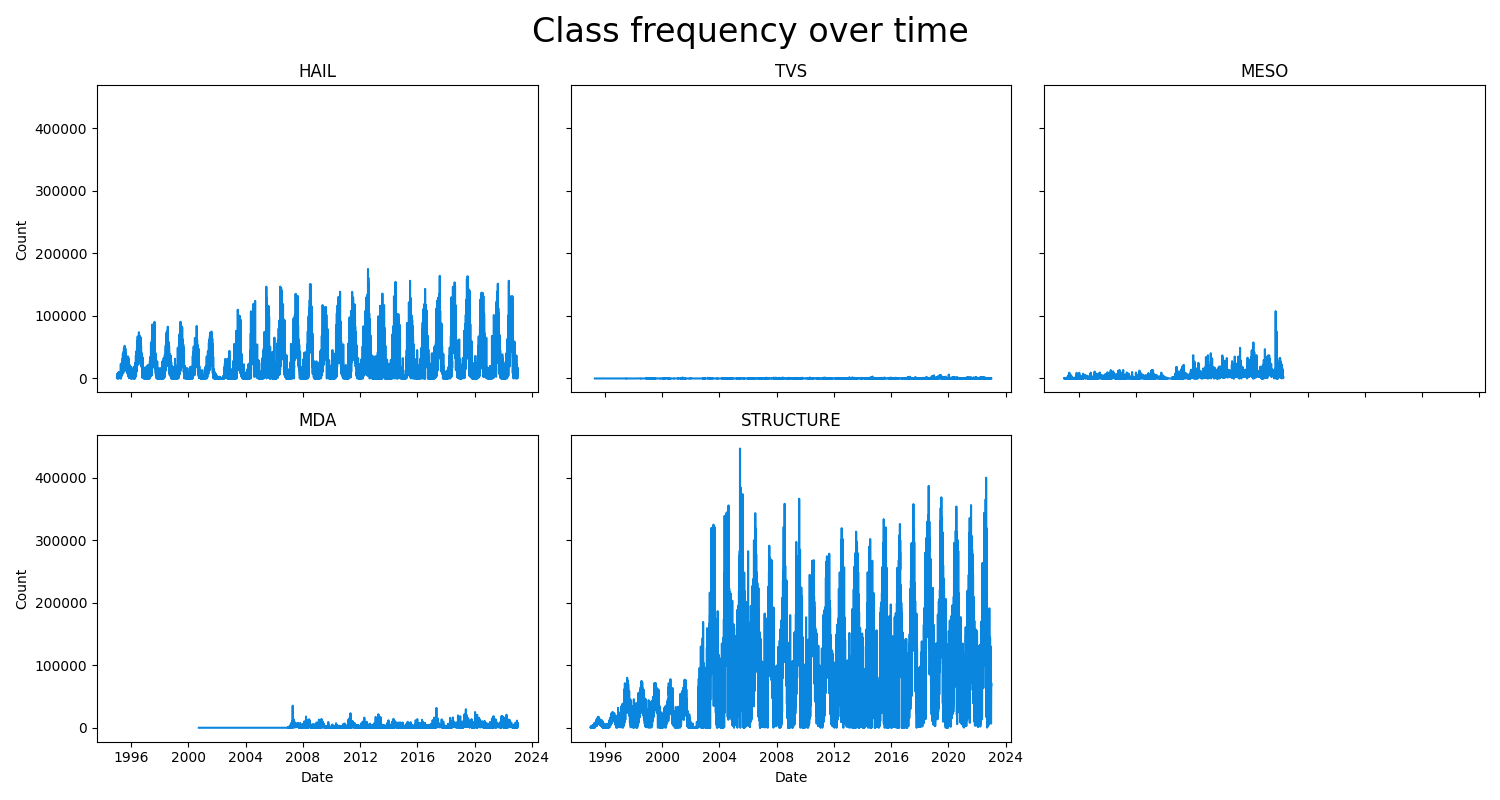

In [13]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8), sharey=True, sharex=True, constrained_layout=True)
    
plot_lineplot(hail_daily, 'ZDAY', 'count', axes.flat[0], 'Date', 'Count', 'HAIL')
plot_lineplot(tvs_daily, 'ZDAY', 'count', axes.flat[1], 'Date', 'Count', 'TVS')
plot_lineplot(meso_daily, 'ZDAY', 'count', axes.flat[2], 'Date', 'Count', 'MESO')
plot_lineplot(mda_daily, 'ZDAY', 'count', axes.flat[3], 'Date', 'Count', 'MDA')
plot_lineplot(struc_daily, 'ZDAY', 'count', axes.flat[4], 'Date', 'Count', 'STRUCTURE')

axes.flat[5].axis('off')

plt.suptitle('Class frequency over time', fontsize=24)
plt.tight_layout()

fig.savefig('class-freq.png', dpi=200)

%matplot plt

### Average detection range of devices for phenomenon detection

In [14]:
def bar_plot_topn_bottn(dataframe, x_column, y_column, n, ax,  xlabel, title, bott=False):
    if bott:
        temp = dataframe.sort_values(y_column, ascending=True)
        temp = temp.iloc[0:n].sort_values(y_column, ascending=True).copy()
        color = '#ff3131'
    else:
        temp = dataframe.sort_values(y_column, ascending=False)
        temp = temp.iloc[0:n].sort_values(y_column, ascending=True).copy()
        color = '#0a86df'
        
    ax.barh(temp[x_column], temp[y_column], color=color)

    ax.set_xlabel(xlabel)
    ax.set_title(title)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [15]:
hail_ave_range = hail.groupby('WSR_ID').agg(F.mean('RANGE').alias('AVG_RANGE')).toPandas()
tvs_ave_range = tvs.groupby('WSR_ID').agg(F.mean('RANGE').alias('AVG_RANGE')).toPandas()
meso_ave_range = meso.groupby('WSR_ID').agg(F.mean('RANGE').alias('AVG_RANGE')).toPandas()
mda_ave_range = mda.groupby('WSR_ID').agg(F.mean('RANGE').alias('AVG_RANGE')).toPandas()
struc_ave_range = structure.groupby('WSR_ID').agg(F.mean('RANGE').alias('AVG_RANGE')).toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

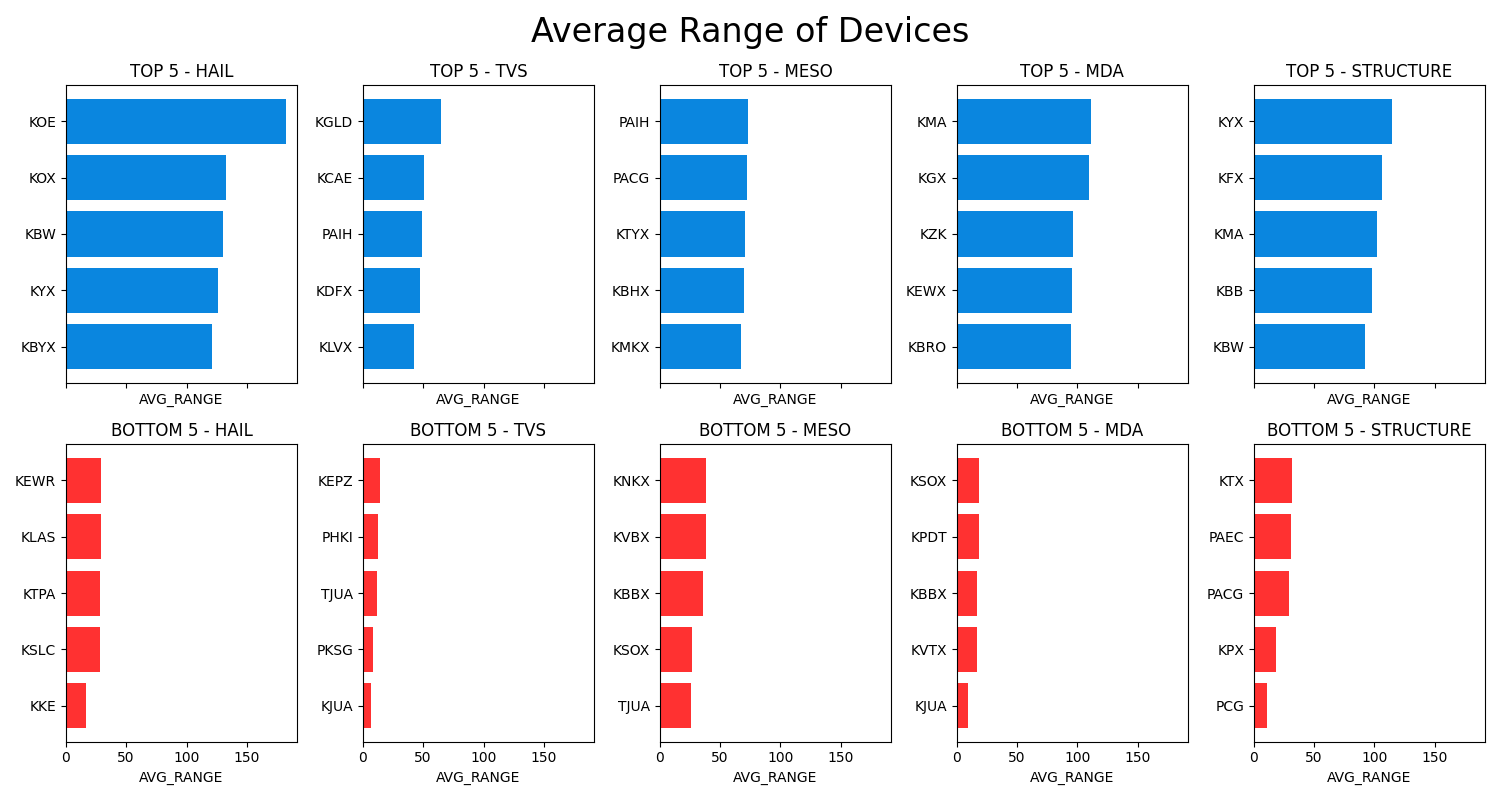

In [16]:
fig, axes = plt.subplots(2, 5, figsize=(15, 8), sharex=True, constrained_layout=True)

bar_plot_topn_bottn(hail_ave_range, 'WSR_ID', 'AVG_RANGE', 5, axes.flat[0],  'AVG_RANGE', 'TOP 5 - HAIL', bott=False)
bar_plot_topn_bottn(hail_ave_range, 'WSR_ID', 'AVG_RANGE', 5, axes.flat[5],  'AVG_RANGE', 'BOTTOM 5 - HAIL', bott=True)

bar_plot_topn_bottn(tvs_ave_range, 'WSR_ID', 'AVG_RANGE', 5, axes.flat[1],  'AVG_RANGE', 'TOP 5 - TVS', bott=False)
bar_plot_topn_bottn(tvs_ave_range, 'WSR_ID', 'AVG_RANGE', 5, axes.flat[6],  'AVG_RANGE', 'BOTTOM 5 - TVS', bott=True)

bar_plot_topn_bottn(meso_ave_range, 'WSR_ID', 'AVG_RANGE', 5, axes.flat[2],  'AVG_RANGE', 'TOP 5 - MESO', bott=False)
bar_plot_topn_bottn(meso_ave_range, 'WSR_ID', 'AVG_RANGE', 5, axes.flat[7],  'AVG_RANGE', 'BOTTOM 5 - MESO', bott=True)

bar_plot_topn_bottn(mda_ave_range, 'WSR_ID', 'AVG_RANGE', 5, axes.flat[3],  'AVG_RANGE', 'TOP 5 - MDA', bott=False)
bar_plot_topn_bottn(mda_ave_range, 'WSR_ID', 'AVG_RANGE', 5, axes.flat[8],  'AVG_RANGE', 'BOTTOM 5 - MDA', bott=True)

bar_plot_topn_bottn(struc_ave_range, 'WSR_ID', 'AVG_RANGE', 5, axes.flat[4],  'AVG_RANGE', 'TOP 5 - STRUCTURE', bott=False)
bar_plot_topn_bottn(struc_ave_range, 'WSR_ID', 'AVG_RANGE', 5, axes.flat[9],  'AVG_RANGE', 'BOTTOM 5 - STRUCTURE', bott=True)

plt.suptitle('Average Range of Devices', fontsize=24)
plt.tight_layout()

fig.savefig('top-bott-wsrid-range.png', dpi=200)

%matplot plt